In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import missingno
from sklearn.preprocessing import LabelEncoder

In [56]:
# load titanic dataset

filename = 'titanic.csv'
df = pd.read_csv(filename)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.shape

(891, 12)

In [31]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
# Eliminating the Name column for now

df = df.drop('Name', axis = 1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
# Transforming the object Dtypes to int64 

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Ticket'] = LabelEncoder().fit_transform(df['Ticket'])
df['Cabin'] = LabelEncoder().fit_transform(df['Cabin'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int32  
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    int32  
 10  Embarked     891 non-null    int32  
dtypes: float64(2), int32(4), int64(5)
memory usage: 62.8 KB


In [40]:
df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,1,35.0,0,0,472,8.0500,147,2
5,6,0,3,1,NaN,0,0,275,8.4583,147,1
6,7,0,1,1,54.0,0,0,85,51.8625,129,2
7,8,0,3,1,2.0,3,1,395,21.0750,147,2
8,9,1,3,0,27.0,0,2,344,11.1333,147,2
9,10,1,2,0,14.0,1,0,132,30.0708,147,0


In [41]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [42]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [43]:
# Simple Imputation: Fill missing values with mean for numeric columns

df_imputed = df.copy()
df_imputed['Age'] = df_imputed['Age'].fillna(df_imputed['Age'].mean())
df_imputed['Cabin'] = df_imputed['Cabin'].fillna(df_imputed['Cabin'].mean())
df_imputed['Embarked'] = df_imputed['Embarked'].fillna(df_imputed['Embarked'].mean())
df_imputed.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [44]:
df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,1,35.0,0,0,472,8.0500,147,2
5,6,0,3,1,NaN,0,0,275,8.4583,147,1
6,7,0,1,1,54.0,0,0,85,51.8625,129,2
7,8,0,3,1,2.0,3,1,395,21.0750,147,2
8,9,1,3,0,27.0,0,2,344,11.1333,147,2
9,10,1,2,0,14.0,1,0,132,30.0708,147,0


In [45]:
mean = df.mean()
df.fillna(mean, inplace=True)
print(df)

     PassengerId  Survived  Pclass  Sex        Age  SibSp  Parch  Ticket  \
0              1         0       3    1  22.000000      1      0     523   
1              2         1       1    0  38.000000      1      0     596   
2              3         1       3    0  26.000000      0      0     669   
3              4         1       1    0  35.000000      1      0      49   
4              5         0       3    1  35.000000      0      0     472   
..           ...       ...     ...  ...        ...    ...    ...     ...   
886          887         0       2    1  27.000000      0      0     101   
887          888         1       1    0  19.000000      0      0      14   
888          889         0       3    0  29.699118      1      2     675   
889          890         1       1    1  26.000000      0      0       8   
890          891         0       3    1  32.000000      0      0     466   

        Fare  Cabin  Embarked  
0     7.2500    147         2  
1    71.2833     81    

In [46]:
df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.000000,1,0,523,7.2500,147,2
1,2,1,1,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,0,26.000000,0,0,669,7.9250,147,2
3,4,1,1,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,1,35.000000,0,0,472,8.0500,147,2
5,6,0,3,1,29.699118,0,0,275,8.4583,147,1
6,7,0,1,1,54.000000,0,0,85,51.8625,129,2
7,8,0,3,1,2.000000,3,1,395,21.0750,147,2
8,9,1,3,0,27.000000,0,2,344,11.1333,147,2
9,10,1,2,0,14.000000,1,0,132,30.0708,147,0


A. What is the most important factor in determining survival of the Titanic incident?

I believe the passenger's class played the highest vital role in their survival determination. This case, those found in the Pclass 1 were indeed prioritised over those in Pclass 3 during the evacuation. Others like age & sex may be considered but the Passenger Class status typically emerges as the strongest factor in survival prediction.

In [47]:
survive_pclass = df[['Survived', 'Pclass']]
df[['Survived', 'Pclass']]

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


In [48]:
survive_pclass.corr()

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000


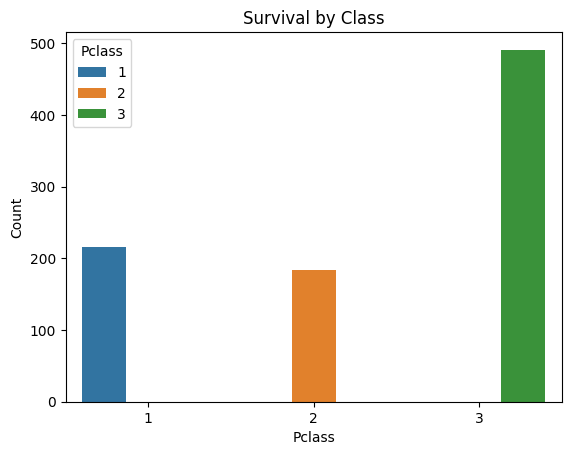

In [77]:
# Survival by Class
sns.countplot(x='Pclass', hue='Pclass', data=df)
plt.title('Survival by Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

In [89]:
# Survival percentage by Gender, thus Male & Females

gender_surv_percentage = df.groupby('Sex')['Survived'].mean() * 100
print("Survival Percentage by Gender:\n", gender_surv_percentage)

Survival Percentage by Gender:
 Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


Per this calculation, data shows females had higher survival rate against males just as the visual representation below.

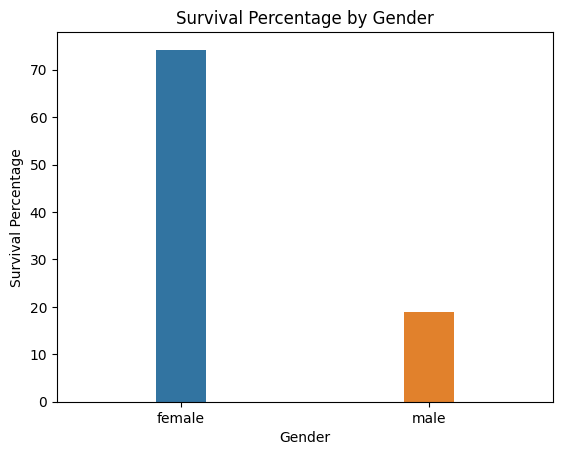

In [86]:
# Plotting survival percentage by Gender

sns.barplot(x=gender_surv_percentage.index, y=gender_surv_percentage.values, width=.2)
plt.title('Survival Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Percentage')
plt.show()

C:\Users\entam\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


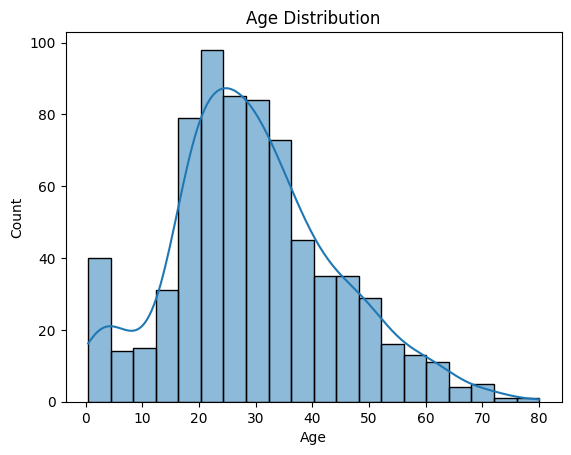

In [69]:
# Age distribution

sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\entam\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\entam\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\entam\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


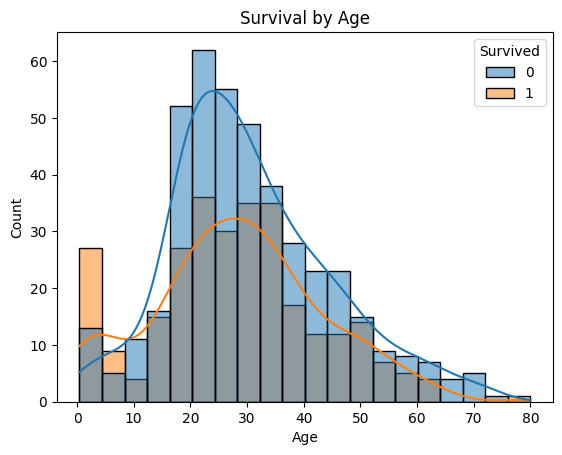

In [61]:
# Survival by age

sns.histplot(x='Age', hue='Survived', data=df, bins=20, kde=True)
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

B. In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?

In [6]:
# In this case, using mean to find each of the Pclass types have the highest survival rate.

group_Pclass_survive = df.groupby('Pclass')['Survived'].mean()
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Based on the above mean results in approximation, Pclass 1(Upper-class) = 0.63 , Pclass 2(Middle-calss) = 0.473 and lastly Pclass 3(Lower-class) = 0.24 
Hence Pclass 1 which is the upper-class had the highest survival as a result of life boat evacuation.

In [70]:
# Survival percentage by Gender, thus Male & Females

gender_surv_percentage = df.groupby('Sex')['Survived'].mean() * 100
print("Survival Percentage by Gender:\n", gender_surv_percentage)

Survival Percentage by Gender:
 Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


C. “Women and children first”. Was this the case?

Yes that was the case as the data shows female passengers received higher exponential evacuation priority than males. And also data supported children and women first. 

D. Add one other observation that you have noted in the dataset.

An interesting observation also noticed is the distribution of ages among passengers, with a considerable allocation falling into the younger age bracket. Nevertheless, survival rates appear relatively consistent across various age groups.